In [ ]:
# TASK ONE: TWEET EMOTIONS DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.layers import Dropout




In [ ]:
#Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading Csv File
df = pd.read_csv('/content/drive/My Drive/Csv Files/tweet_emotions.csv')

In [ ]:
# Separate features (X) and target variable (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print (X,y)

                       Id                                              Tweet
0      145353048817012000  Thinks that @melbahughes had a great 50th birt...
1      144279638024257000  Como una expresiÃ³n tan simple, una sola oraci...
2      140499585285111000  the moment when you get another follower and y...
3      145207578270507000  Be the greatest dancer of your life! practice ...
4      139502146390470000  eww.. my moms starting to make her annual rum ...
...                   ...                                                ...
21046  146254676558495000  @TheBodyShopUK Knowing my dissertation will be...
21047  141661025014521000  hospital tomorrow morning, strapped with wires...
21048  143061444525686000  Work is soooo slow, ready to have a great satu...
21049  143068383678697000  You realize that by choosing joy every single ...
21050  138424500801900000  &quot;Use to throw them into disarray.&quot;-M...

[21051 rows x 2 columns] 0        surprise
1         sadness
2             

In [ ]:
#checking how many unique classes can there be and how many instances lie in each unique class
unique, counts = np.unique(df['Label'], return_counts=True)


In [ ]:
unique

array(['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise'],
      dtype=object)

In [ ]:
counts

array([1555,  761, 2816, 8240, 3830, 3849])

In [ ]:
#here goes the result of how many unique classes and number of instances in each class respectively.
result = np.column_stack((unique, counts))
result

array([['anger', 1555],
       ['disgust', 761],
       ['fear', 2816],
       ['joy', 8240],
       ['sadness', 3830],
       ['surprise', 3849]], dtype=object)

In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['Tweet']) #now Tokenizing on the Tweet column, or simply put, assigning unique number to each unique word for 10K words.
sequences = tokenizer.texts_to_sequences(df['Tweet']) #turning tweet of words into sequence of numbers to make it readable and learnable for the model.
word_index = tokenizer.word_index
X = pad_sequences(sequences, maxlen=10000)
Y = pd.get_dummies(df['Label']).values #one-hot-encoding
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify = y) #data split




In [ ]:
X

array([[   0,    0,    0, ..., 5906,  195,  247],
       [   0,    0,    0, ..., 4907, 7660, 2572],
       [   0,    0,    0, ...,    6,   11,  956],
       ...,
       [   0,    0,    0, ...,    4,  128,  628],
       [   0,    0,    0, ...,   11,  709, 1324],
       [   0,    0,    0, ...,   17, 2577, 1000]], dtype=int32)

In [ ]:
word_index

{'the': 1,
 'i': 2,
 'to': 3,
 'a': 4,
 'my': 5,
 'and': 6,
 'of': 7,
 'in': 8,
 'is': 9,
 'for': 10,
 'you': 11,
 'it': 12,
 'me': 13,
 'that': 14,
 'on': 15,
 'have': 16,
 'quot': 17,
 'with': 18,
 'be': 19,
 'this': 20,
 'not': 21,
 'just': 22,
 'so': 23,
 'at': 24,
 'amp': 25,
 "i'm": 26,
 'up': 27,
 'when': 28,
 'your': 29,
 'all': 30,
 'love': 31,
 'today': 32,
 'but': 33,
 'day': 34,
 'tomorrow': 35,
 'was': 36,
 'out': 37,
 'time': 38,
 'now': 39,
 'get': 40,
 'like': 41,
 'are': 42,
 "don't": 43,
 'no': 44,
 'christmas': 45,
 'one': 46,
 'do': 47,
 'we': 48,
 'what': 49,
 'will': 50,
 'from': 51,
 'work': 52,
 'about': 53,
 'back': 54,
 'go': 55,
 'an': 56,
 'going': 57,
 'people': 58,
 "it's": 59,
 'can': 60,
 'they': 61,
 'if': 62,
 'u': 63,
 'got': 64,
 'good': 65,
 'night': 66,
 'rt': 67,
 'know': 68,
 'home': 69,
 '2': 70,
 "can't": 71,
 'life': 72,
 'as': 73,
 'he': 74,
 'then': 75,
 'de': 76,
 'how': 77,
 'en': 78,
 'some': 79,
 'more': 80,
 'by': 81,
 'off': 82,
 'its'

In [ ]:
X_train

array([[   0,    0,    0, ...,  289,  207, 2340],
       [   0,    0,    0, ...,    9, 1934, 1663],
       [   0,    0,    0, ...,  923,    9, 2993],
       ...,
       [   0,    0,    0, ...,    5,  203, 1122],
       [   0,    0,    0, ...,    5,   69, 8807],
       [   0,    0,    0, ...,  684,   51,  154]], dtype=int32)

In [ ]:
labels = pd.get_dummies(df['Label'])
labels

,anger,disgust,fear,joy,sadness,surprise
0,False,False,False,False,False,True
1,False,False,False,False,True,False
2,False,False,False,True,False,False
3,False,False,False,True,False,False
4,False,True,False,False,False,False
...,...,...,...,...,...,...
21046,False,False,False,True,False,False
21047,False,False,False,True,False,False
21048,False,False,False,True,False,False
21049,False,False,False,True,False,False


In [ ]:

labels.shape[1]

6

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(10000,)), # First hidden layer with 64 neurons
    Dense(32, activation='relu'),                      # Second hidden layer with 32 neurons
    Dense(6, activation='softmax')       # Output layer (number of classes)
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │         640,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 642,342 (2.45 MB)

 Trainable params: 642,342 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train,y_train,epochs=12,batch_size=32,validation_split=0.2)

Epoch 1/12
421/421 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - acc: 0.3318 - loss: 5.6332 - val_acc: 0.3771 - val_loss: 1.6619
Epoch 2/12
421/421 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - acc: 0.3894 - loss: 1.6465 - val_acc: 0.3762 - val_loss: 1.6298
Epoch 3/12
421/421 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - acc: 0.3954 - loss: 1.5857 - val_acc: 0.3765 - val_loss: 1.6124
Epoch 4/12
421/421 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - acc: 0.3897 - loss: 1.5758 - val_acc: 0.3759 - val_loss: 1.6262
Epoch 5/12
421/421 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - acc: 0.3974 - loss: 1.5780 - val_acc: 0.3759 - val_loss: 1.6023
Epoch 6/12
421/421 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - acc: 0.4020 - loss: 1.5674 - val_acc: 0.3759 - val_loss: 1.6078
Epoch 7/12
421/421 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - acc: 0.3855 - loss: 1.5783 - val_acc: 0.3762 - val_loss: 1.6155
Epoch 8/12
421/421 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - acc: 0.3900 - loss: 1.5835 - val_acc: 0.3762 - val_loss: 1.6189
Epoch 9/12
421/421 ━━━━━━━━━━━━━━━━━━━━ 5s 11m

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)


132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.3786 - loss: 1.5812
Test accuracy: 0.3918309211730957


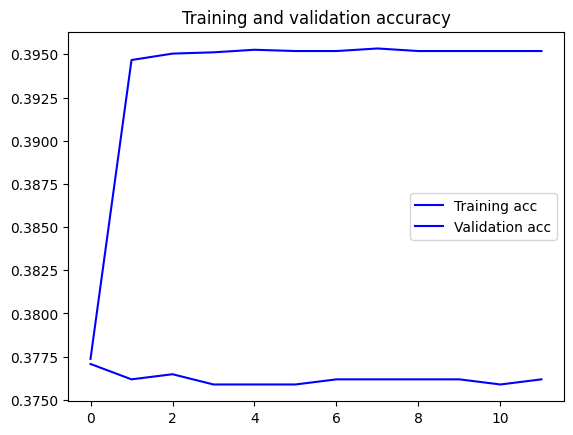

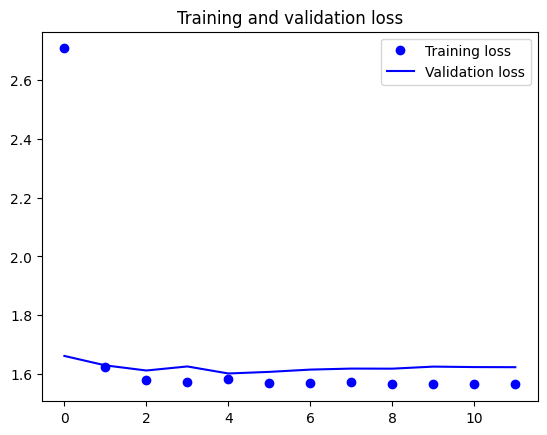

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate(X_test,y_test)

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.3786 - loss: 1.5812


[1.568654179573059, 0.3918309211730957]

In [ ]:
Yes, accuracy may vary across different emotions due to variations in the linguistic expressions and contextual nuances associated with each emotion.

In [ ]:
# TASK TWO : BBC NEWS DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.layers import Dropout

In [ ]:
#Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading Csv File
df = pd.read_csv('/content/drive/My Drive/Csv Files/bbcsports.csv')

In [ ]:
df


,Unnamed: 0,text,label
0,0,Sharapova overcomes tough Molik\n\nWimbledon c...,tennis
1,1,GB players warned over security\n\nBritain's D...,tennis
2,2,Federer wins title in Rotterdam\n\nWorld numbe...,tennis
3,3,Mauresmo fights back to win title\n\nWorld num...,tennis
4,4,Agassi into second round in Dubai\n\nFourth se...,tennis
...,...,...,...
732,732,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics
733,733,IAAF launches fight against drugs\n\nThe IAAF ...,athletics
734,734,Greene sets sights on world title\n\nMaurice G...,athletics
735,735,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics


In [ ]:
#checking how many unique classes can there be and how many instances lie in each unique class
unique, counts = np.unique(df['label'], return_counts=True)



In [ ]:
unique

array(['athletics', 'cricket', 'football', 'rugby', 'tennis'],
      dtype=object)

In [ ]:
counts

array([101, 124, 265, 147, 100])

In [ ]:
#here goes the result of how many unique classes and number of instances in each class respectively.
result = np.column_stack((unique, counts))

In [ ]:
result

array([['athletics', 101],
       ['cricket', 124],
       ['football', 265],
       ['rugby', 147],
       ['tennis', 100]], dtype=object)

In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['text']) #now Tokenizing on the Tweet column, or simply put, assigning unique number to each unique word for 10K words.
sequences = tokenizer.texts_to_sequences(df['text']) #turning tweet of words into sequence of numbers to make it readable and learnable for the model.
word_index = tokenizer.word_index
X = pad_sequences(sequences, maxlen=10000)
Y = pd.get_dummies(df['label']).values #one-hot-encoding
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) #data split

In [ ]:
X_train

array([[  77,    5, 1277, ...,  118,    1,  656],
       [   0,    0,    0, ..., 5800,    1, 1072],
       [ 759,   26,  870, ...,  748,    3, 8247],
       ...,
       [3605,  540, 1254, ...,   16,   22,  593],
       [   0,    0,    0, ...,    2, 8095,  952],
       [   0,    0,    0, ..., 1409, 1641, 2121]], dtype=int32)

In [53]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(10000,)), # First hidden layer with 64 neurons
    Dense(32, activation='relu'),                      # Second hidden layer with 32 neurons
    Dense(5, activation='softmax')       # Output layer (number of classes)
])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 64)                  │         640,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 642,309 (2.45 MB)

 Trainable params: 642,309 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.2432 - loss: 174.7020 - val_acc: 0.2627 - val_loss: 28.4215
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3073 - loss: 25.8240 - val_acc: 0.1695 - val_loss: 7.0079
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2906 - loss: 2.6058 - val_acc: 0.1441 - val_loss: 4.9453
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3273 - loss: 2.2303 - val_acc: 0.3644 - val_loss: 4.8731
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.4314 - loss: 1.5475 - val_acc: 0.3729 - val_loss: 6.7465
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3976 - loss: 1.6996 - val_acc: 0.3729 - val_loss: 4.9346
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3947 - loss: 1.6368 - val_acc: 0.3729 - val_loss: 4.7671
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3966 - loss: 1.5977 - val_acc: 0.3814 - val_loss: 3.7127
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.

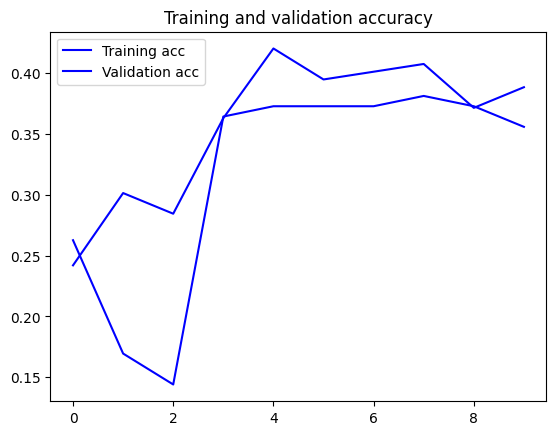

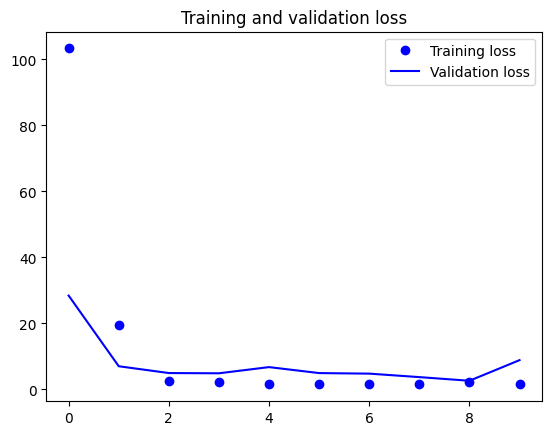

In [55]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [56]:
model.evaluate(X_test,y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.3151 - loss: 12.3921 


[10.753872871398926, 0.3243243098258972]

In [ ]:
The accuracy may vary across different topics due to variations in the complexity and distinctiveness of news articles within each category.Topics like sports or entertainment might have more distinct feature representations compared to topics like politics, which may contain more nuanced and overlappings.